<a href="https://colab.research.google.com/github/ungvietanh20172394/handwritten_number_recognition/blob/master/Nh%E1%BA%ADn_di%E1%BB%87n_ch%E1%BB%AF_s%E1%BB%91_vi%E1%BA%BFt_tay.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Giới thiệu

Xây dựng mang neural network nhận diện chữ viết tay
Dữ liệu: Bộ dữ liệu MNiST. Đầu vào là một ảnh đen trắng, đầu ra là chữ số trong ảnh. Các bước bao gồm:
*   Nạp dữ liệu
*   Định nghĩa kiến trúc của mô hình
*   Huấn luyện mô hình và theo dõi hiệu quả của nó
*   Đánh giá mô hình thông qua các dự đoán của nó

#Load data

In [2]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist

In [18]:
# download and load the data (split them between train and test sets)
(x_train0, y_train), (x_test0, y_test) = mnist.load_data()

In [19]:
import matplotlib.pyplot as plt 

In [20]:
x_train0.shape # xem kích thước dữ liệu

(60000, 28, 28)

Nhãn:  8


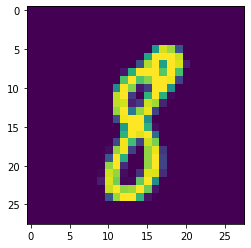

In [25]:
i = 300
print("Nhãn: ",y_train[i])
plt.imshow(x_train0[i])

In [21]:
x_train = x_train0 / 255
x_train = x_train.reshape(60000,28,28,1)

In [22]:
x_train.shape

(60000, 28, 28, 1)

In [23]:
x_test = x_test0 / 255
x_test = x_test.reshape(10000,28,28,1)

In [24]:
x_test.shape

(10000, 28, 28, 1)

#Build model


In [7]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(32, [3, 3], activation='relu', input_shape=(28,28,1)))
model.add(tf.keras.layers.Conv2D(64, [3, 3], activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1179776   
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0

In [9]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])

#Model Train

In [36]:
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1390/1875 [=====================>........] - ETA: 1s - loss: 0.0241 - acc: 0.9921

KeyboardInterrupt: ignored

#Model Evaluation

In [47]:
import numpy as np
from keras_preprocessing import image
img = []
images = x_test0[8] 
x = image.img_to_array(images)
x = np.expand_dims(x, axis=0)
x = x/255.0
img.append(x)
model.predict(x)

array([[1.0992647e-08, 3.0198619e-10, 3.0150885e-15, 8.1441060e-12,
        2.6488515e-11, 9.9740857e-01, 2.5907136e-03, 2.1739664e-15,
        6.3591267e-07, 5.2822056e-08]], dtype=float32)

5


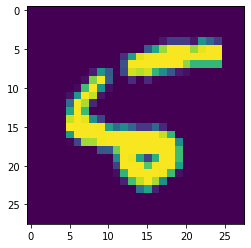

In [48]:
i = 8
plt.imshow(x_test0[i])
print(y_test[i])

In [49]:
score = model.evaluate(x_test, y_test, verbose = 0) 

print('Test loss:', score[0]) 
print('Test accuracy:', score[1])

Test loss: 0.033034563064575195
Test accuracy: 0.9908999800682068
